# Investigating TMDb's Movie Dataset
<img src="https://cutewallpaper.org/25/best-movie-hd-wallpaper/1541023576.jpg" alt="Girl in a jacket" width="500" height="600" style="float: right">

## Table of Contents
<ol>
    <li><a href="#intro" style="text-decoration: none; color: black"><b>Introduction</b></a></li>
<li style="padding-top:10px"><a href="#wrangling" style="text-decoration: none; color: black"><b>Data Wrangling:</b></a>
    <ul>
        <li><a href="#missing-values" style="text-decoration: none; color: black">Handling Missing Values</a></li>
        <li><a href="#changing_col_dtypes" style="text-decoration: none; color: black">Changing Column Data Types</a></li>
        <li><a href="#handling-outliers" style="text-decoration: none; color: black">Handling Outliers</a></li>
    </ul>
</li>
<li style="padding-top:10px"><a href="#eda" style="text-decoration: none; color: black"><b>Exploratory Data Analysis:</b></a>
    <ul>
        <li><a href="#q1" style="text-decoration: none; color: black">Which genres are popular year by year?</a></li>
        <li><a href="#q3" style="text-decoration: none; color: black">What aspects do highly rated movies have in common?</a></li>
    </ul>
</li>
<li style="padding-top:10px"><a href="#conclusions" style="text-decoration: none; color: black"><b>Conclusion</b></a></li>
<li style="padding-top:10px"><a href="#references" style="text-decoration: none; color: black"><b>References</b></a></li>
</ol>

<a id='intro'></a>
## 1. Introduction

### 1.1. Dataset Description 

> The film industry is undeniably a very large business worldwide, with a new global box office revenue record of **\\$42.5 billion** in 2019. Just like any business, the ultimate goal is to make money, which requires a budget to begin with. While some movies turn out to be huge successes with huge revenues, others become complete failures costing extreme losses. This dataset includes info about over **10,000 movies** collected from **The Movie Database (TMDb)**. The dataset contains different information about the movies such as their ratings and revenues in terms of 2010 US dollars. The dataset columns are listed below.

> **Dataset Columns:**
    <table style="align:left;display:block; padding:5">
      <tr>
        <th style="text-align: left">id</th>
        <th style="text-align: center">Movie id in the dataset</th>
      </tr>
      <tr>
        <td style="text-align: left">imdb_id</td>
        <td style="text-align: center">Movie id as given by IMDb</td>
      </tr>
      <tr>
        <td style="text-align: left">popularity</td>
        <td style="text-align: center">Numeric measure of how popular the movie is</td>
      </tr>
      <tr>
        <td style="text-align: left">budget</td>
        <td style="text-align: center">Movie's budget in US dollars</td>
      </tr>
      <tr>
        <td style="text-align: left">revenue</td>
        <td style="text-align: center">Movie's revenue in US dollars</td>
      </tr>
      <tr>
        <td style="text-align: left">original_title</td>
        <td style="text-align: center">Movie's title</td>
      </tr>
      <tr>
        <td style="text-align: left">cast</td>
        <td style="text-align: center">Names of the movie actors separated by |</td>
      </tr>
      <tr>
        <td style="text-align: left">homepage</td>
        <td style="text-align: center">URL to the movie's website</td>
      </tr>
      <tr>
        <td style="text-align: left">director</td>
        <td style="text-align: center">Name of the movie director</td>
      </tr>
      <tr>
        <td style="text-align: left">tagline</td>
        <td style="text-align: center">Movie's tagline</td>
      </tr>
      <tr>
        <td style="text-align: left">keywords</td>
        <td style="text-align: center">List of keywords related to the movie separated by |</td>
      </tr>
      <tr>
        <td style="text-align: left">overview</td>
        <td style="text-align: center">Short description of the movie</td>
      </tr>
      <tr>
        <td style="text-align: left">runtime</td>
        <td style="text-align: center">Movie duration in minutes</td>
      </tr>
      <tr>
        <td style="text-align: left">genres</td>
        <td style="text-align: center">Genres the movie belongs to separated by |</td>
      </tr>
      <tr>
        <td style="text-align: left">production_companies</td>
        <td style="text-align: center">Movie's production company names separated by |</td>
      </tr>
      <tr>
        <td style="text-align: left">release_date</td>
        <td style="text-align: center">Movie's release date in the format MM/DD/YY</td>
      </tr>
      <tr>
        <td style="text-align: left">vote_count</td>
        <td style="text-align: center">Number of votes given to the movie on the website</td>
      </tr>
      <tr>
        <td style="text-align: left">vote_average</td>
        <td style="text-align: center">Average voting given to the movie on a scale 0-10</td>
      </tr>
      <tr>
        <td style="text-align: left">release_year</td>
        <td style="text-align: center">Movie's release year</td>
      </tr>
      <tr>
        <td style="text-align: left">budget_adj</td>
        <td style="text-align: center">Movie's budget in 2010 US dollars</td>
      </tr>
      <tr>
        <td style="text-align: left">revenue_adj</td>
        <td style="text-align: center">Movie's revenues in 2010 US dollars</td>
      </tr>
    </table>

### 1.2. Questions for Analysis
>The data will be explored and analyzed in light of the following questions:
    <ol>
    <li> Which genres are popular from year to year?</li>
    <li> What aspects do highly rated movies have in common?</li>
    </ol>

In [865]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Make visualizations inline with the notebook
%matplotlib inline

# Seaborn plotting settings
sns.set_theme()

<a id='wrangling'></a>
## 2. Data Wrangling

### 2.1. Loading Dataset
> First, we will start by loading the dataset into a Pandas dataframe and examine the values in the first 5 rows.

In [866]:
# Loading data
df = pd.read_csv('tmdb-movies.csv')

# Settings to display all columns
pd.set_option("display.max_columns", None)

# Display first 5 rows
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> We will also take a look of the data types and count of non-null values in each column to check whether the data needs cleaning.

In [867]:
# Checking columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### 2.2. Data Cleaning
> In order to clean the data, the following steps will be taken:
    <ul>
    <li>**Handling Missing Values:** The dataframe info shows the presence of NULL values in several columns </li>
    <li>**Changing Column Data Types:** Given the description of the dataset columns, some of them need to be converted to a different type to facilitate the analysis </li>
    <li>**Handling Outliers:** Data will be checked for outliers to be dealt with if they exist </li>
    </ul>
 

<a id='missing-values'></a>
#### 2.2.1. Handling Missing Values
> Next, we will examine the number of missing values in our data to determine how to deal with them.

In [868]:
# Display the count of NULL values per column
df.isnull().sum(axis = 0)

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> From the above cell, it's clear that several columns have missing values. We will deal with them as follows:
    <ul>
    <li>imdb_id: We will drop this column since there's another unique identifier for each row which is the id having no NULL values </li>
    <li>remaining columns: Missing values will be filled with an empty string as an indication.</li>
    </ul>

In [869]:
# Drop imdb_id column
df= df.drop(columns=['imdb_id'])

# Fill missing values with an empty string
df= df.fillna(" ")

# Check that there are no missing values left
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [870]:
# Print general data statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [871]:
# Printing the percentages of movies with missing budget or revenue
total= len(df)
print("Percentage of movies with unkown budget: {:.2f}%".format(len(df[df['budget_adj']==0])/total*100))
print("Percentage of movies with unkown revenue: {:.2f}%".format(len(df[df['revenue_adj']==0])/total*100))

Percentage of movies with unkown budget: 52.42%
Percentage of movies with unkown revenue: 55.37%


> **Note:** From the above values, it is noticed that above 50% of movies in the dataset have unkown budget and revenue information as they are zero valued. This should be noted when using the budget and revenue values later in the analysis phase.

<a id='changing_col_dtypes'></a>
#### 2.2.2. Changing Column Data Types
> In this part, we need to change certain column values into a format we can work with. This includes the following:
    <ul>
    <li> Change release_date into a datetime format</li>
    <li> Change columns with listed values in a string into a list by separating on the delimiter "|"</li>
    </ul>

In [872]:
# Add full release year to release date
def changeYearFormat(d):
    d= d.split("/")
    if int(d[-1]) >= 60:
        d[-1]="19"+d[-1]
    else:
        d[-1]="20"+d[-1]
    return "-".join(d)
        
df['release_date'] = df['release_date'].apply(lambda d: changeYearFormat(d))

# Convert release_date column to a datetime format
format = '%m-%d-%Y'
df['release_date'] = df['release_date'].apply(lambda d: datetime.datetime.strptime(d, format) )

df.head(3)

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [873]:
# Listing column names having a string of listed values 
target_columns= ['cast', 'keywords', 'production_companies', 'genres']

# Converting them to lists
for c in target_columns:
    df[c]= df[c].apply(lambda s: s.split("|"))

df.head(3)

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,"[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,"[future, chase, post-apocalyptic, dystopia, au...",An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,"[based on novel, revolution, dystopia, sequel,...",Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='handling-outliers'></a>
#### 2.2.3. Handling Outliers
> In this section, we will examine the distribution of data within the different columns to check for any outliers and whether they should be handled. 

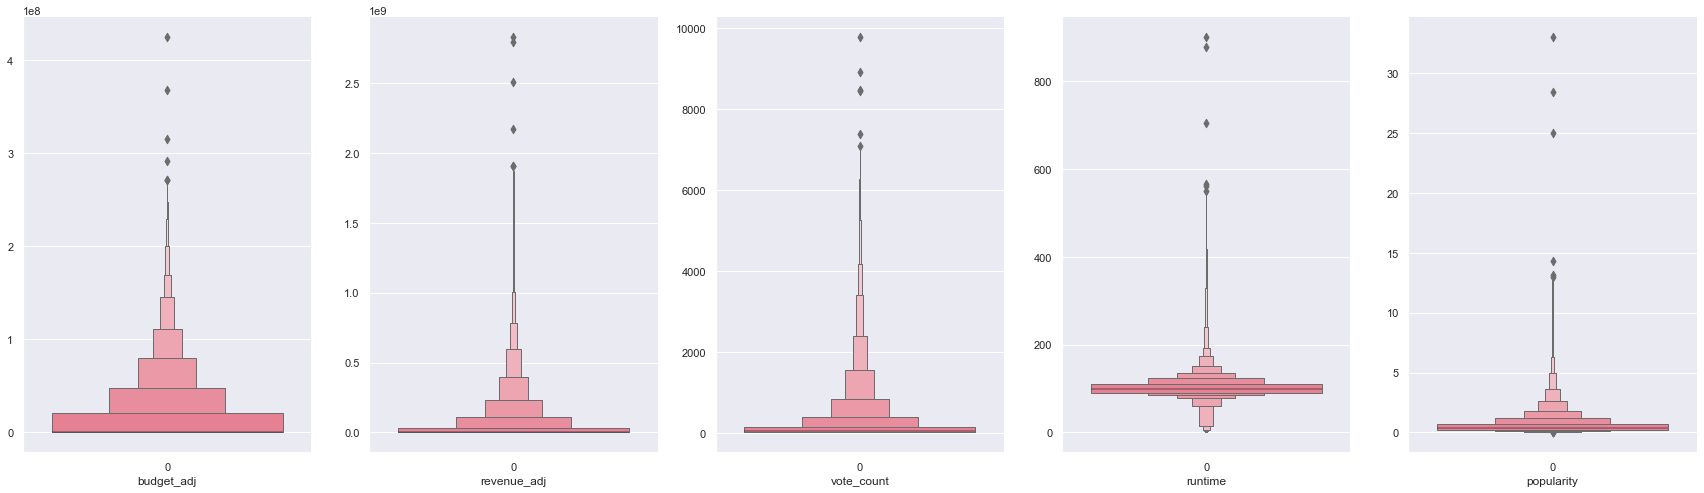

In [874]:
# Examine the boxplots of different features
features= ["budget_adj", "revenue_adj", "vote_count", "runtime", "popularity"]

# Create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxenplot(data=df[features[i]],
                showfliers=True,
                ax=axs[i],
                palette= "husl"
                ).set(xlabel=features[i])
  sns.despine()

In [875]:
# Print some statistics about outliers
print("Percentage of movies with budget_adj > 250 million US dollars: {:.2f}%".format(len(df[df['budget_adj']> 250*10**6])/total*100))
print("Percentage of movies with revenue_adj > 1.75 billion US dollars: {:.2f}%".format(len(df[df['revenue_adj']> 1.75*10**9])/total*100))
print("Percentage of movies with vote_count > 7000 votes: {:.2f}%".format(len(df[df['vote_count']> 7000])/total*100))
print("Percentage of movies with runtime > 400 minutes: {:.2f}%".format(len(df[df['runtime']> 400])/total*100))
print("Percentage of movies with popularity > 10: {:.2f}%".format(len(df[df['popularity']> 10])/total*100))

Percentage of movies with budget_adj > 250 million US dollars: 0.09%
Percentage of movies with revenue_adj > 1.75 billion US dollars: 0.06%
Percentage of movies with vote_count > 7000 votes: 0.06%
Percentage of movies with runtime > 400 minutes: 0.11%
Percentage of movies with popularity > 10: 0.10%


> Since the percentages of movies forming outliers is very low (<1%), we will drop them.

In [876]:
# Dropping rows with outliers
df = df.drop(df[df['budget_adj']> 250*10**6].index)
df = df.drop(df[df['revenue_adj']> 1.75*10**9].index)
df = df.drop(df[df['vote_count']> 7000].index)
df = df.drop(df[df['runtime']> 400].index)
df = df.drop(df[df['popularity']> 10].index)
print("Number of rows dropped= {}".format(total-len(df)))

Number of rows dropped= 42


<a id='eda'></a>
## 3. Exploratory Data Analysis

> Now that our data is clean and ready for analysis, we'll start exploring to find answers for our questions one by one.

<a id='q1'></a>
### 3.1. Which genres are popular from year to year?
> To answer this question, we will examine the following:
    <ul>
    <li> The most common genres of produced movies over the years </li>
    <li> The genres that the most popular movies belong to over the years</li>
    </ul>
To do this, we need first to find the unique genre values and to explode the genres column into a new dataframe.

In [877]:
# Find the unique genres of movies in the dataset
df["genres"].explode().unique()

array(['Action', 'Crime', 'Thriller', 'Western', 'Drama', 'Adventure',
       'Science Fiction', 'Family', 'Animation', 'Comedy', 'Fantasy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', ' ', 'Foreign'], dtype=object)

In [878]:
# Represent a single movie in multiple rows based on the genres it belongs to
exploded_genres_df= df.copy()
exploded_genres_df= exploded_genres_df.explode('genres')
exploded_genres_df.head(3)

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4,168259,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,"[car race, speed, revenge, suspense, car]",Deckard Shaw seeks revenge against Dominic Tor...,137,Action,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
4,168259,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,"[car race, speed, revenge, suspense, car]",Deckard Shaw seeks revenge against Dominic Tor...,137,Crime,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
4,168259,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,"[car race, speed, revenge, suspense, car]",Deckard Shaw seeks revenge against Dominic Tor...,137,Thriller,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [879]:
# Remove movies with missing genres
exploded_genres_df= exploded_genres_df[exploded_genres_df['genres']!=' ']

#### 3.1.1. The most common genres of produced movies over the years
> A histogram will be used to show the counts of movies belonging to each genre per year. To make the visualization clearer, the years will be divided into 2 histograms as follows.

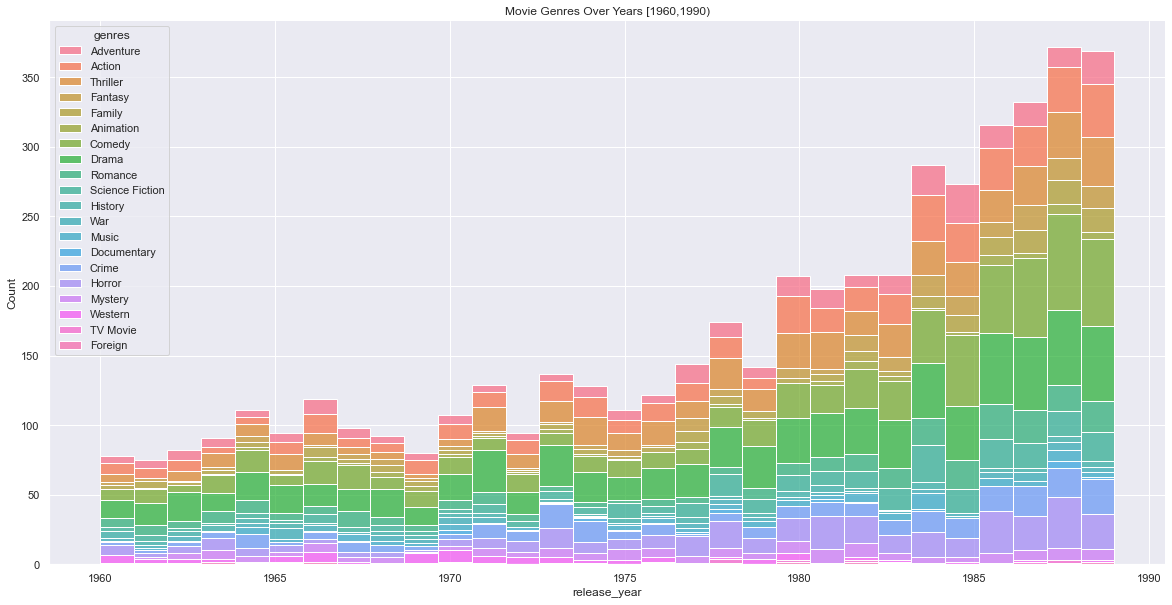

In [880]:
# Plotting a histogram of movie genres over the years
plt.figure(figsize=(20, 10))

sns.histplot(exploded_genres_df[exploded_genres_df['release_year']<1990], x="release_year", hue="genres",
             multiple="stack", bins=30).set(title="Movie Genres Over Years [1960,1990)")
sns.despine()

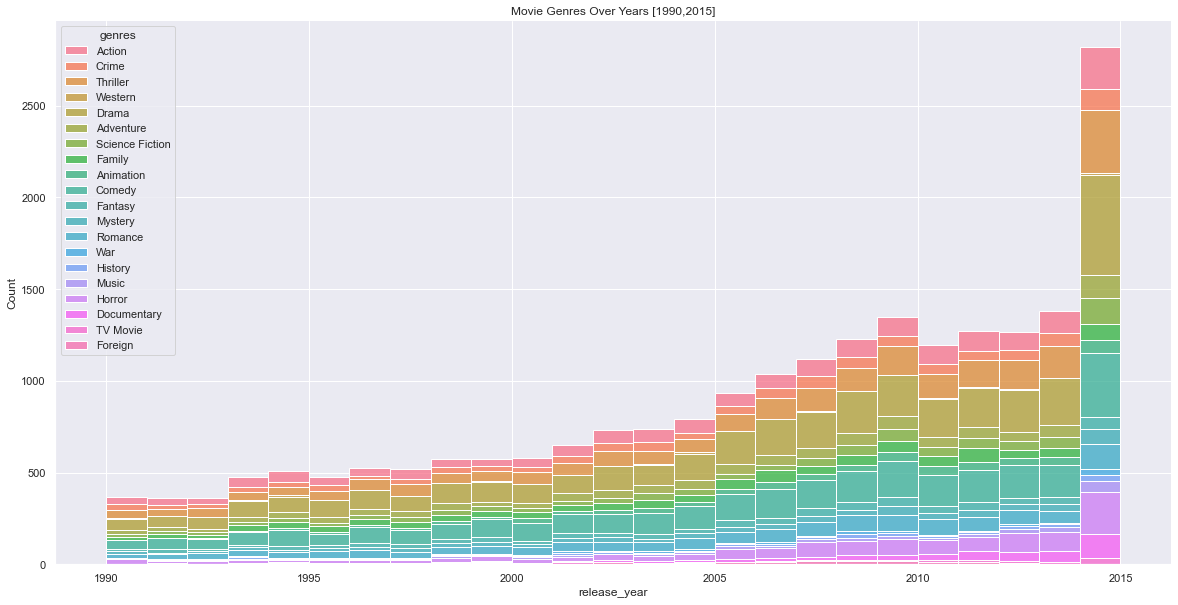

In [881]:
plt.figure(figsize=(20, 10))

sns.histplot(exploded_genres_df[exploded_genres_df['release_year']>=1990], x="release_year", hue="genres", palette="husl",
             multiple="stack", bins=25).set(title="Movie Genres Over Years [1990,2015]")
sns.despine()

In [882]:
# Get the most common genre in every year
exploded_genres_df.groupby(['release_year'])['genres'].agg(pd.Series.mode).to_frame()

,genres
release_year,
1960,Drama
1961,Drama
1962,Drama
1963,"[Comedy, Drama]"
1964,Drama
1965,Drama
1966,"[Comedy, Drama]"
1967,Comedy
1968,Drama


> From the previous cell and the above histograms, it's clear that the most common genres of movies created over the years are **Drama** and **Comedy** respectively. 

#### 3.1.2. The genres that the most popular movies belong to over the years
> Now, we'll examine the common genres in relation to movie popularity.
    **Note:** Since popularity can be a subjective measure, we will keep in mind that TMDb calculates the popularity of a movie based on the following factors:
  <ul>
    <li> Number of votes for the day </li>
    <li> Number of views for the day </li>
    <li> Number of users who marked it as a "favourite" for the day </li>
    <li> Number of users who added it to their "watchlist" for the day </li>
    <li> Release date </li>
    <li> Number of total votes </li>
    <li> Previous days score </li>
  </ul>
  source: https://developers.themoviedb.org/3/getting-started/popularity

In [883]:
# Find the popularity percentile to mark the most popular movies
target_popularity_percentile= df['popularity'].quantile(.98)
print("The 98th percentile value of popularity: {:.2f}".format(target_popularity_percentile))

The 98th percentile value of popularity: 3.12


In [884]:
# Getting the most popular movies
most_popular_df= exploded_genres_df[exploded_genres_df['popularity'] >= target_popularity_percentile]
most_popular_df.head(3)

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4,168259,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,"[car race, speed, revenge, suspense, car]",Deckard Shaw seeks revenge against Dominic Tor...,137,Action,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
4,168259,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,"[car race, speed, revenge, suspense, car]",Deckard Shaw seeks revenge against Dominic Tor...,137,Crime,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
4,168259,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,"[car race, speed, revenge, suspense, car]",Deckard Shaw seeks revenge against Dominic Tor...,137,Thriller,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<Figure size 960x560 with 0 Axes>

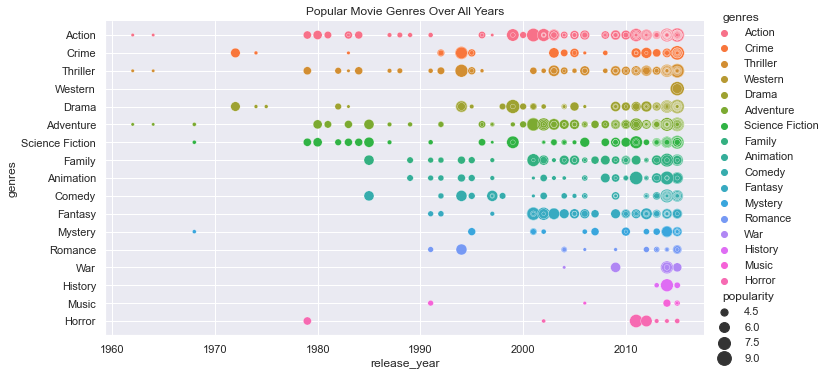

In [885]:
# Plotting a relplot showing the genres and popularity values of the top popular movies over the year
plt.figure(figsize=(12, 7), dpi=80)

g = sns.relplot(data=most_popular_df, x="release_year", y="genres", hue="genres", size="popularity", palette="husl",
    sizes=(10, 200), aspect=20/10).set(title="Popular Movie Genres Over All Years")

> From the above analysis and plots, we can get the following insights:
    <ul>
    <li> More recent movies are likely to have higher popularity than old movies</li>
    <li> **Mystery, horror, history, war, fantasy, and music** genres have gained popularity relatively later than the other genres </li>
    <li> Even though **drama** was the top genre of released movies over the years, it's not always the most popular</li>
    <li> Some genres like **foreign, TV movies and documentary** don't include any top popular movies</li>
    <li> **Western** movies just recently gained popularity</li>
    <li> Genres like **action, adventure and science fiction** retain popularity since a long time</li>
    <li> **Music, history and western** movies are rarely rated as popular movies</li>
    </ul>

<a id='q3'></a>
### 3.2. What aspects do highly rated movies have in common?
> To answer this, we will now examine the common aspects among highly rated movies to see if they are similar to those of high revenue moveis. The following will be explored:
    <ul>
    <li> Relation between runtime and average vote </li>
    <li> Influence of cast, director and production company on average vote</li>
    <li> Budget and revenue characteristics of high rated movies </li>
    </ul>

In [886]:
# Find the vote_average percentile to mark the highest revenue movies
top_rating_percentile= df['vote_average'].quantile(.98)
print("The 98th percentile value of vote_average = {:.1f}".format(top_rating_percentile))

The 98th percentile value of vote_average = 7.7


In [887]:
# Get the highest rated movies
top_rating_df= df[df['vote_average'] >= top_rating_percentile]
print("Top revenue movie count:",len(top_rating_df))

Top revenue movie count: 190


#### 3.2.1. Relation between runtime and average vote
> To find out if a movie's average vote is affected by its runtime, we will use a scatter plot utilizing the vote_count and popularity variables as well as follows.

[Text(0.5, 1.0, 'Top Rated Movies runtime vs vote_average')]

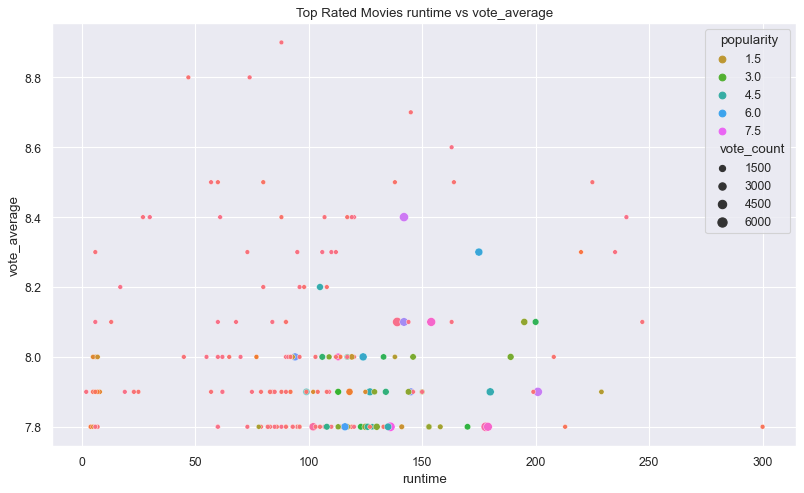

In [888]:
# Create a scatter plot of runtime against vote_average showing the vote_count as size and popularity as hue
plt.figure(figsize=(12, 7), dpi=80)
sns.scatterplot(data=top_rating_df, x="runtime", y="vote_average", palette="husl", hue="popularity", size="vote_count").set(title="Top Rated Movies runtime vs vote_average")

In [889]:
# Find percentage of top rated movies with runtimes between 100 and 150 minutes
total= len(top_rating_df)
print("Percentage of top rated movies with runtime 100-150 minutes: {:.2f}%".
      format(len(top_rating_df[(top_rating_df['runtime']<= 150) & (top_rating_df['runtime']>= 50)])/total*100))

# Find the percentage of top rated movies with runtime >= 200 minutes
print("Percentage of top rated movies with runtime >150 minutes: {:.2f}%".
      format(len(top_rating_df[top_rating_df['runtime']>= 200])/total*100))

# Find the percentage of movies with vote_average>= 8.4 having vote_count <= 1500
total= len(top_rating_df[top_rating_df['vote_average']>= 8.4])
print("Percentage of movies with vote_average >= 8.4 having vote_count <= 1500: {:.2f}%".
     format(len(top_rating_df[(top_rating_df['vote_average']>= 8.4) & (top_rating_df['vote_count']<= 1500)])/total*100))

# Find the percentage of movies with vote_average>= 8.4 having popularity <= 3
print("Percentage of movies with vote_average >= 8.4 having popularity <= 3: {:.2f}%".
     format(len(top_rating_df[(top_rating_df['vote_average']>= 8.4) & (top_rating_df['popularity']<= 3)])/total*100))

Percentage of top rated movies with runtime 100-150 minutes: 72.11%
Percentage of top rated movies with runtime >150 minutes: 5.79%
Percentage of movies with vote_average >= 8.4 having vote_count <= 1500: 95.24%
Percentage of movies with vote_average >= 8.4 having popularity <= 3: 95.24%


> From the above plot, there's no clear trend between runtime and vote_average. However, the following is observed:
    <ul>
    <li> Around **72%** of top rated movies have a runtime between 100 and 150 minutes </li>
    <li> Around **6%** of top rated movies have a runtime >= 200 minutes </li>
    <li> Around **95%** of movies with high ratings (>=8.4) have relatively lower vote_count (<=1500) and popularity (<=3)</li>
    </ul>

#### 3.2.2. Influence of cast, director and production company on average vote
> Is a movie's high rating affected somehow by the people or company involved? This is explored below.

##### Cast


In [890]:
# Represent a single movie in multiple rows based on the actors in it
exploded_cast_df= top_rating_df.copy()
exploded_cast_df= exploded_cast_df.explode('cast')
exploded_cast_df.head(3)

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,"[dream, cartoon, imaginary friend, animation, ...","Growing up can be a bumpy road, and it's no ex...",94,"[Comedy, Animation, Family]","[Walt Disney Pictures, Pixar Animation Studios...",2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08
9,150540,6.326804,175000000,853708609,Inside Out,Phyllis Smith,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,"[dream, cartoon, imaginary friend, animation, ...","Growing up can be a bumpy road, and it's no ex...",94,"[Comedy, Animation, Family]","[Walt Disney Pictures, Pixar Animation Studios...",2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08
9,150540,6.326804,175000000,853708609,Inside Out,Richard Kind,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,"[dream, cartoon, imaginary friend, animation, ...","Growing up can be a bumpy road, and it's no ex...",94,"[Comedy, Animation, Family]","[Walt Disney Pictures, Pixar Animation Studios...",2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


In [891]:
# Remove movies with missing cast
exploded_cast_df= exploded_cast_df[exploded_cast_df['cast']!=' ']

In [892]:
# Get the top actors appearing in several top rated movies
exploded_cast_df.groupby(['cast'])['id'].count().sort_values(ascending=False).head(10)

cast
Elijah Wood        5
Jared Leto         4
Robert De Niro     4
Ian McKellen       4
Louis Tomlinson    3
Louis C.K.         3
Liam Payne         3
Robert Duvall      3
Mark Ruffalo       3
Jenna Coleman      3
Name: id, dtype: int64

> From the above list of names, we can see that actors like **Elijah Wood** appeared the most (5 times) in the top rated movies from our dataset, followed by **Jared Leto, Robert De Niro, and Ian McKellen** appearing 4 times.

> **Note:** it should be noted that the movie cast is listed in the dataset and no information is given about the importance of each actor's role. Hence, an actor can appear in many top rated movies but in minor roles.

> We'll now find the top directors of the top rated movies.

#### Director

In [893]:
# Make a copy of the dataframe to edit
top_director_df= top_rating_df.copy()

# Remove movies with missing director
top_director_df= top_director_df[top_director_df['director']!=' ']

# Get the top actors appearing in several top rated movies
top_director_df.groupby(['director'])['id'].count().sort_values(ascending=False).head(10)

director
Martin Scorsese         5
Peter Jackson           3
Quentin Tarantino       3
David Fincher           3
Francis Ford Coppola    3
Adam Curtis             2
Louis C.K.              2
Jonathan Demme          2
Rajkumar Hirani         2
Robert Zemeckis         2
Name: id, dtype: int64

> From the above list of directors, we can see that **Martin Scorsese** directed the largest number of top rated movies from our dataset (5 movies), followed by **Peter Jackson, Quentin Tarantino, David Fincher and Francis Ford Coppola** directing 3 movies each. This data is less uncertain compared to the cast as there is only one director per movie and there is no ambiguity about their role.

> Next, we will follow the same analysis approach to find the top production companies
#### Production Companies

In [894]:
# Represent a single movie in multiple rows based on its production companies
exploded_companies_df= top_rating_df.copy()
exploded_companies_df= exploded_companies_df.explode('production_companies')

# Remove movies with missing director
exploded_companies_df= exploded_companies_df[exploded_companies_df['production_companies']!=' ']

# Get the top actors appearing in several top rated movies
exploded_companies_df.groupby(['production_companies'])['id'].count().sort_values(ascending=False).head(10)

production_companies
Universal Pictures               7
Pixar Animation Studios          7
Warner Bros.                     7
Paramount Pictures               5
New Line Cinema                  5
Regency Enterprises              4
Miramax Films                    4
Participant Media                4
Walt Disney Animation Studios    4
TSG Entertainment                3
Name: id, dtype: int64

> Following the same approach, it is found that the top production companies are **Universal Pictures, Pixar Animation Studios, Warner Bros.** producing 7 movies each, followed by **Paramount Pictures and New Line Cinema** producing 5 movies each.

> **Note:** Here we are considering the companies producing the highest number of top rated movies. However, we are not taking into consideration what the total number of movies produced by these companies. A company can produce a few number of movies but they are all top rated while another can produce a large number of movies with a small percentage being top rated.

#### 3.2.3. Budget and revenue characteristics of high rated movies
> To examine the revenue_obj and budget_adj characteristics of a high rated movie, we need to use the data of movies having non zero values for those 2 variables. Hence, we will use a new dataframe as follows.

In [895]:
# drop movies with no budget and revenue values
monetary_df = df[(df['revenue_adj']!=0) & (df['budget_adj']!=0)]
len(monetary_df)

3825

In [896]:
# Find the vote_average percentile to mark the highest revenue movies
top_rating_percentile= monetary_df['vote_average'].quantile(.98)
print("The 98th percentile value of vote_average = {:.1f}".format(top_rating_percentile))

The 98th percentile value of vote_average = 7.7


In [897]:
# Get the highest rated movies
top_rating_df= monetary_df[monetary_df['vote_average'] >= top_rating_percentile]
print("Top revenue movie count:",len(top_rating_df))

Top revenue movie count: 85


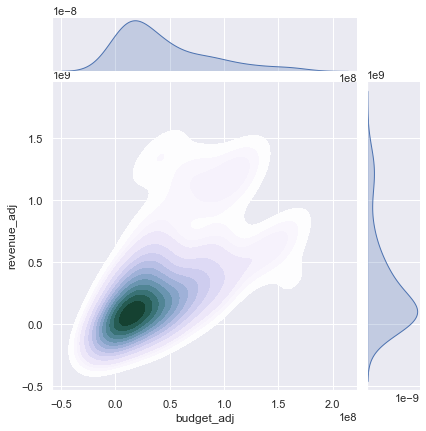

In [898]:
# Show the joint distribution using kernel density estimation
cmap = sns.cubehelix_palette(start=2, light=1, as_cmap=True)
g = sns.jointplot(data=top_rating_df, x="budget_adj", y="revenue_adj", kind="kde", cmap=cmap, fill=True, levels=15)
sns.despine()

> From the above graph, we notice that for high rated movies, the density peak occurs nearly at budget_adj around **20 million** and revenue_adj around **150 million** US dollars. It is also noticed that a high budget movie does not guarantee high revenues.

In [899]:
# Showing statistics about the quartiles of top rated movies
top_rating_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,85.000000,85.000000,8.500000e+01,8.500000e+01,85.000000,85.000000,85.000000,85.000000,8.500000e+01,8.500000e+01
mean,50596.058824,3.399178,3.367981e+07,2.180957e+08,131.400000,2223.811765,7.851765,1997.494118,4.288444e+07,3.182267e+08
std,84715.686126,2.295616,4.070322e+07,2.757010e+08,30.335505,1594.315187,0.162284,15.743195,4.056688e+07,3.706611e+08
min,13.000000,0.066504,2.000000e+05,3.000000e+00,42.000000,22.000000,7.700000,1960.000000,2.025573e+05,3.038360e+00
25%,284.000000,1.765514,6.000000e+06,3.200000e+07,113.000000,1100.000000,7.700000,1987.000000,1.215546e+07,5.916177e+07
50%,935.000000,3.072555,1.900000e+07,9.024762e+07,129.000000,1894.000000,7.800000,2000.000000,2.763273e+07,1.455593e+08
75%,80379.000000,4.780419,4.500000e+07,3.191310e+08,148.000000,3396.000000,7.900000,2013.000000,6.326999e+07,4.409595e+08
max,314365.000000,8.947905,1.780000e+08,1.327818e+09,213.000000,6351.000000,8.400000,2015.000000,1.639542e+08,1.424626e+09


> With the support of the above stats, we can deduce the following:
    <ul>
    <li> Around **50%** of high rated movies in the dataset have a budget_adj in the range between **12-63 million** US dollars, with a mean value at **42 million** US dollars </li>
    <li> Around **50%** of high rated movies in the dataset have a revenue_adj in the range between **59-440 million** US dollars, with the a mean value at **318 million** US dollars </li>
    </ul>

<a id='conclusions'></a>
## 4. Conclusion

> At the end of our analysis, the results and findings can be summarized as follows:

### Popular Genres Over The Years:
> <ul>
    <li> More recent movies are likely to have higher popularity than old movies</li>
    <li> <b>Mystery, horror, history, war, fantasy, and music</b> genres have gained popularity relatively later than the other genres </li>
    <li> Even though <b>drama</b> was the top genre of released movies over the years, it's not always the most popular</li>
    <li> Some genres like <b>foreign, TV movies and documentary</b> don't include any top popular movies</li>
    <li> <b>Western</b> movies just recently gained popularity</li>
    <li> Genres like <b>action, adventure and science fiction</b> retain popularity since a long time</li>
    <li> <b>Music, history and western</b> movies are rarely rated as popular movies</li>
  </ul>
  
> **Notes:**
    <ul>
        <li> TMDb's popularity measure seems to give higher popularity values to more recent movies over older movies. To make the analysis more accurate, movies can be divided into segments based on their release time and compared according to their popularity.</li>
        <li> A limitation includes the fact that we can never be certain whether a genre is popular because people are interested in it generally or because the movies produced belonging to this genre are of better quality than other genres.</li>
    </ul>

### Common Aspects Between Top Rated Movies:
> **Runtime:**
  <ul>
    <li> Around <b>72%</b> of top rated movies have a runtime between 100 and 150 minutes </li>
    <li> Around <b>6%</b> of top rated movies have a runtime >= 200 minutes </li>
    <li> Around <b>95%</b> of movies with high ratings (>=8.4) have relatively lower vote_count (<=1500) and popularity (<=3)</li>
  </ul>
  
> **Cast:**
    <ol> 
    <li> <b>Elijah Wood</b>: appeared in 5 top rated movies</li>
    <li> <b>Jared Leto, Robert De Niro, and Ian McKellen</b>: appeared in 4 top rated movies</li>
    </ol>

> **Directors:**
    <ol> 
    <li> <b>Martin Scorsese</b>: directed 5 top rated movies</li>
    <li> <b>Peter Jackson, Quentin Tarantino, David Fincher and Francis Ford Coppola</b>: directed 3 top rated movies</li>
    </ol>
    
> **Production Companies:**
    <ol> 
    <li> <b>Universal Pictures, Pixar Animation Studios, Warner Bros</b>: producing 7 top rated movies</li>
    <li> <b>Paramount Pictures and New Line Cinema</b>: producing 5 top rated movies</li>
    </ol>   

> **Budget & Revenues:**
    <ol> 
    <li> Around <b>50%</b> of high rated movies in the dataset have a budget_adj in the range between <b>12-63 million</b> US dollars, with a mean value at <b>42 million</b> US dollars</li>
    <li> Around <b>50%</b> of high rated movies in the dataset have a revenue_adj in the range between <b>59-440 million</b> US dollars, with the a mean value at <b>318 million</b> US dollars</li>
    </ol> 
    
> **Notes:** 
    <ul>
        <li> The movie cast is listed in the dataset and no information is given about the importance of each actor's role. Hence, an actor can appear in many top rated movies but in minor roles.</li>
        <li> We are considering the companies producing the highest number of top rated movies. However, we are not taking into consideration what the total number of movies produced by these companies. A company can produce a few number of movies but they are all top rated while another can produce a large number of movies with a small percentage being top rated. The same goes for the directors. If the values are weighted by the total number of movies produced/directed, this would be more indicative.</li>
    <li> Almost <b>50%</b> of the dataset has missing budget and revenue information, which imposes a limitation on the accuracy of the analysis results.</li>
    </ul>

<a id='references'></a>
## 5. References
> <ul>
    <li> <b>TMDb documentation:</b> https://developers.themoviedb.org/3/getting-started/popularity</li>
    <li> <b>Seaborn's plot gallery:</b> https://seaborn.pydata.org/examples/index.html </li>
  </ul>